# VIVEK PATEL
> Sparks Foundation - Computer Vision & Internet of Things Internship!

## Task_1 - Detection of face mask Intermediate Level

### Table of Content
[Download Data](https://www.kaggle.com/andrewmvd/face-mask-detection)
 
 
 - Data Preprocessing.
 - Creating our own validation set.
 - Preprocessing images.
 - Turning our data into Batches.
 - Building a model with `MobileNetV2`.
 - Train a model.
 - Predict on custom data.
 - Making GUI with tkinter.

## 0.Data preprocessing

### Rename all file

In [1]:
import os

#For rename in single folder 
def rename_image(path,name):
    '''
    Take the path of the folder and the name of what you want to rename.
    '''
    for count, filename in enumerate(os.listdir(path)):
        dst = name + '.' + str(count) + ".jpeg"
        src = path + filename
        dst = path + dst
        os.rename(src,dst)
    print("image change is :",count)
    
#For rename in subfolder    
def file_name(path):
    
    label = []
    for filename in os.listdir(path):#take folder name from that path
        label.append(filename)
    
    for i, name in enumerate(label):
        real_path = path + label[i] + '/'
        #real_path looks like below
        #'DATA/withmask'
        #'DATA/Withoutmask'        
        rename_image(real_path,name)

#call fun
file_name('DATA/')

image change is : 293
image change is : 280


### Move Files

In [2]:
#takes old and new path and move file from old to new path
def move_files(old,new):
    for filename in os.listdir(old):
        os.replace(str(old) + str(filename), str(new) + str(filename))

#move file from both subfolders        
def file_change(old_path,new_path):
    
    label = []
    for filename in os.listdir(old_path):#take folder name from that path
        label.append(filename)
        
    for i, name in enumerate(label):
        real_path = old_path + label[i] + '/'
        #real_path looks like below
        #'DATA/withmask'
        #'DATA/Withoutmask'
        move_files(real_path,new_path)
    print("File moved")

#call fun    
file_change(old_path='DATA/',new_path='FULL_DATA/')

File moved


### Convert data into dataframe

In [2]:
import os
import pandas as pd
filenames=os.listdir("FULL_DATA/")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='withmask':
        categories.append('withmask')
    else:
        categories.append('withoutmask')
df=pd.DataFrame({
    'filename':filenames,
    'labels':categories
})

### Save to csv file

In [3]:
df.to_csv('data.csv',index=False)
df

filename       labels
0        withmask.0.jpeg     withmask
1        withmask.1.jpeg     withmask
2       withmask.10.jpeg     withmask
3      withmask.100.jpeg     withmask
4      withmask.101.jpeg     withmask
..                   ...          ...
570  withoutmask.95.jpeg  withoutmask
571  withoutmask.96.jpeg  withoutmask
572  withoutmask.97.jpeg  withoutmask
573  withoutmask.98.jpeg  withoutmask
574  withoutmask.99.jpeg  withoutmask

[575 rows x 2 columns]

## 1. Import Tools

In [4]:
# Import tensorflow
import tensorflow as tf
import tensorflow_hub as hub

# Check virsion 
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

TF version: 2.3.0
TF Hub version: 0.8.0


## 2. Getting our data ready

### 2.1 Read csv file

In [5]:
# Import pandas
import pandas as pd
labels_csv = pd.read_csv("data.csv")

In [6]:
labels_csv

filename       labels
0        withmask.0.jpeg     withmask
1        withmask.1.jpeg     withmask
2       withmask.10.jpeg     withmask
3      withmask.100.jpeg     withmask
4      withmask.101.jpeg     withmask
..                   ...          ...
570  withoutmask.95.jpeg  withoutmask
571  withoutmask.96.jpeg  withoutmask
572  withoutmask.97.jpeg  withoutmask
573  withoutmask.98.jpeg  withoutmask
574  withoutmask.99.jpeg  withoutmask

[575 rows x 2 columns]

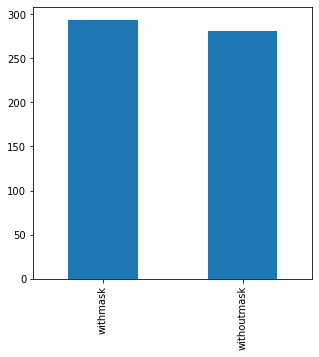

In [7]:
# How many images are there of each class?
import matplotlib.pyplot as plt
labels_csv["labels"].value_counts().plot.bar(figsize=(5, 5));

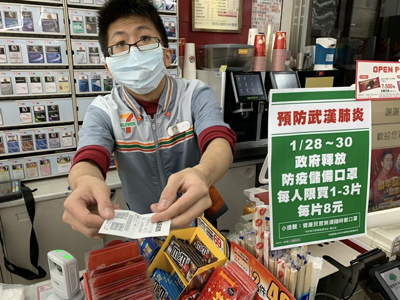

In [8]:
# Let's view an image
from IPython.display import Image
Image("FULL_DATA/withmask.12.jpeg")

In [9]:
# Create pathnames from image ID's
filenames = ["FULL_DATA/" + fname for fname in labels_csv["filename"]]

# Check the first 15
filenames[:15]

['FULL_DATA/withmask.0.jpeg',
 'FULL_DATA/withmask.1.jpeg',
 'FULL_DATA/withmask.10.jpeg',
 'FULL_DATA/withmask.100.jpeg',
 'FULL_DATA/withmask.101.jpeg',
 'FULL_DATA/withmask.102.jpeg',
 'FULL_DATA/withmask.103.jpeg',
 'FULL_DATA/withmask.104.jpeg',
 'FULL_DATA/withmask.105.jpeg',
 'FULL_DATA/withmask.106.jpeg',
 'FULL_DATA/withmask.107.jpeg',
 'FULL_DATA/withmask.108.jpeg',
 'FULL_DATA/withmask.109.jpeg',
 'FULL_DATA/withmask.11.jpeg',
 'FULL_DATA/withmask.110.jpeg']

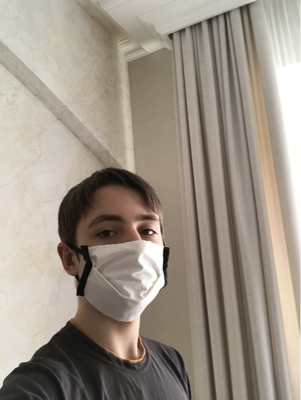

In [10]:
# One more check
Image(filenames[57])

In [11]:
labels_csv["labels"][57]

'withmask'

In [12]:
filenames[42]

'FULL_DATA/withmask.136.jpeg'

### 2.2 let's prepare our labels.

In [13]:
import numpy as np
labels = labels_csv["labels"].to_numpy() 
labels

array(['withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withma

In [14]:
len(labels)

575

In [15]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("labels matches number of filenames!")
else:
  print("labels does not match number of filenames")

labels matches number of filenames!


In [16]:
# Find the unique label values
unique_category = np.unique(labels)
len(unique_category)

2

In [17]:
unique_category

array(['withmask', 'withoutmask'], dtype=object)

### 2.3 Turn label into an array of booleans

In [18]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_category

withmask


array([ True, False])

In [19]:
# Turn every label into a boolean array
boolean_labels = [label == unique_category for label in labels]
boolean_labels[:2]

[array([ True, False]), array([ True, False])]

In [20]:
len(boolean_labels)

575

In [21]:
filenames[:10]

['FULL_DATA/withmask.0.jpeg',
 'FULL_DATA/withmask.1.jpeg',
 'FULL_DATA/withmask.10.jpeg',
 'FULL_DATA/withmask.100.jpeg',
 'FULL_DATA/withmask.101.jpeg',
 'FULL_DATA/withmask.102.jpeg',
 'FULL_DATA/withmask.103.jpeg',
 'FULL_DATA/withmask.104.jpeg',
 'FULL_DATA/withmask.105.jpeg',
 'FULL_DATA/withmask.106.jpeg']

### 2.4 Creating our own validation set

In [22]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [23]:
# Let's split data
from sklearn.model_selection import train_test_split

# Into train and valid 
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                  random_state=2509)
len(X_train), len(X_val), len(y_train), len(y_val)

(460, 115, 460, 115)

In [24]:
# Let's show data
X_train[:5],y_train[:5]

(['FULL_DATA/withmask.195.jpeg',
  'FULL_DATA/withmask.243.jpeg',
  'FULL_DATA/withmask.143.jpeg',
  'FULL_DATA/withmask.175.jpeg',
  'FULL_DATA/withmask.90.jpeg'],
 [array([ True, False]),
  array([ True, False]),
  array([ True, False]),
  array([ True, False]),
  array([ True, False])])

## 3. Preprocessing Images

Befor we do, let's see what image looks like in to tensors

In [25]:
# Convert images to Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(400, 301, 4)

### TURNING IMAGES INTO TENSOR

A Function for Preprocessing images:
  1. Take an image filepath as input
  2. Use **Tensorflow** to read the file and save it to a variable `image`
  3. Turn our `image` into Tensors
  4. Normalize our image 
  5. Resize the `images` to be a shape of (224,224)
  6. Return the modified `images`

In [26]:
# Define image size
IMG_SIZE = 224

# Function
def process_image(image_path, image_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image into numerical Tensor with 3 colour channel(RGB)
  image = tf.image.decode_jpeg(image,channels=3)
  # Convert the color channel values to (0-1) values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to (224,224)
  image = tf.image.resize(image, size=[image_size,image_size])

  return image

## 4. Turning our data into Batches

In [27]:
# Create a function to return a tuple (image, label)
def get_image_lable(image_path,label):
  """
  Takes an image file path name and the label,
  processes the image and return a tuple (image, label).
  """
  image = process_image(image_path)
  
  return image,label

In [28]:
# Define the batch size
BATCH_SIZE = 32

# Function to convert data into batches
def create_data_batches(X,y=None, batch_size=BATCH_SIZE,valid_data=False):
  """
  Creates batches of data of image (X) and label (y) pairs.
  Shuffle the data if it's training data but doesn't shuffle if it's validation data.
  """
  # If data is valid dataset (NO SHUFFLE)
  if valid_data:
    print("Creating valid data batches.........")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(get_image_lable).batch(batch_size)
    return data_batch

  else:
    print("Creating train data batches.........")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathname and labels before mapping image processor fun
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_lable).batch(batch_size)

    return data_batch

In [29]:
# Creat training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating train data batches.........
Creating valid data batches.........


In [30]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)))

## 5. Visualizing Data Batches

In [31]:
import matplotlib.pyplot as plt
# Create fun for viewing in a data batch
def show_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  plt.figure(figsize=(20, 20))
  for i in range(25):
    # Subplot
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_category[labels[i].argmax()])
    plt.axis("Off")

In [32]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.8290639 , 0.7989168 , 0.7489518 ],
          [0.8368348 , 0.7949253 , 0.757156  ],
          [0.8347887 , 0.7919862 , 0.7562391 ],
          ...,
          [0.7555388 , 0.7275363 , 0.68832064],
          [0.75496334, 0.72359073, 0.68437505],
          [0.7522453 , 0.7228445 , 0.68490463]],
 
         [[0.8332065 , 0.7960785 , 0.7581167 ],
          [0.8349331 , 0.7940564 , 0.7587623 ],
          [0.8385658 , 0.79552704, 0.7602329 ],
          ...,
          [0.7550596 , 0.72539175, 0.6860776 ],
          [0.7495405 , 0.72289044, 0.68331367],
          [0.75350803, 0.7241159 , 0.6875679 ]],
 
         [[0.83854175, 0.7992101 , 0.7607844 ],
          [0.83522195, 0.7940564 , 0.76071215],
          [0.8386446 , 0.79552704, 0.7640144 ],
          ...,
          [0.7561516 , 0.72547054, 0.6894849 ],
          [0.74893   , 0.7252823 , 0.6823311 ],
          [0.7418264 , 0.72532606, 0.68167895]],
 
         ...,
 
         [[0.31954893, 0.31182173, 0.32818204],
          [0.32599

In [33]:
len(train_images), len(train_labels)

(32, 32)

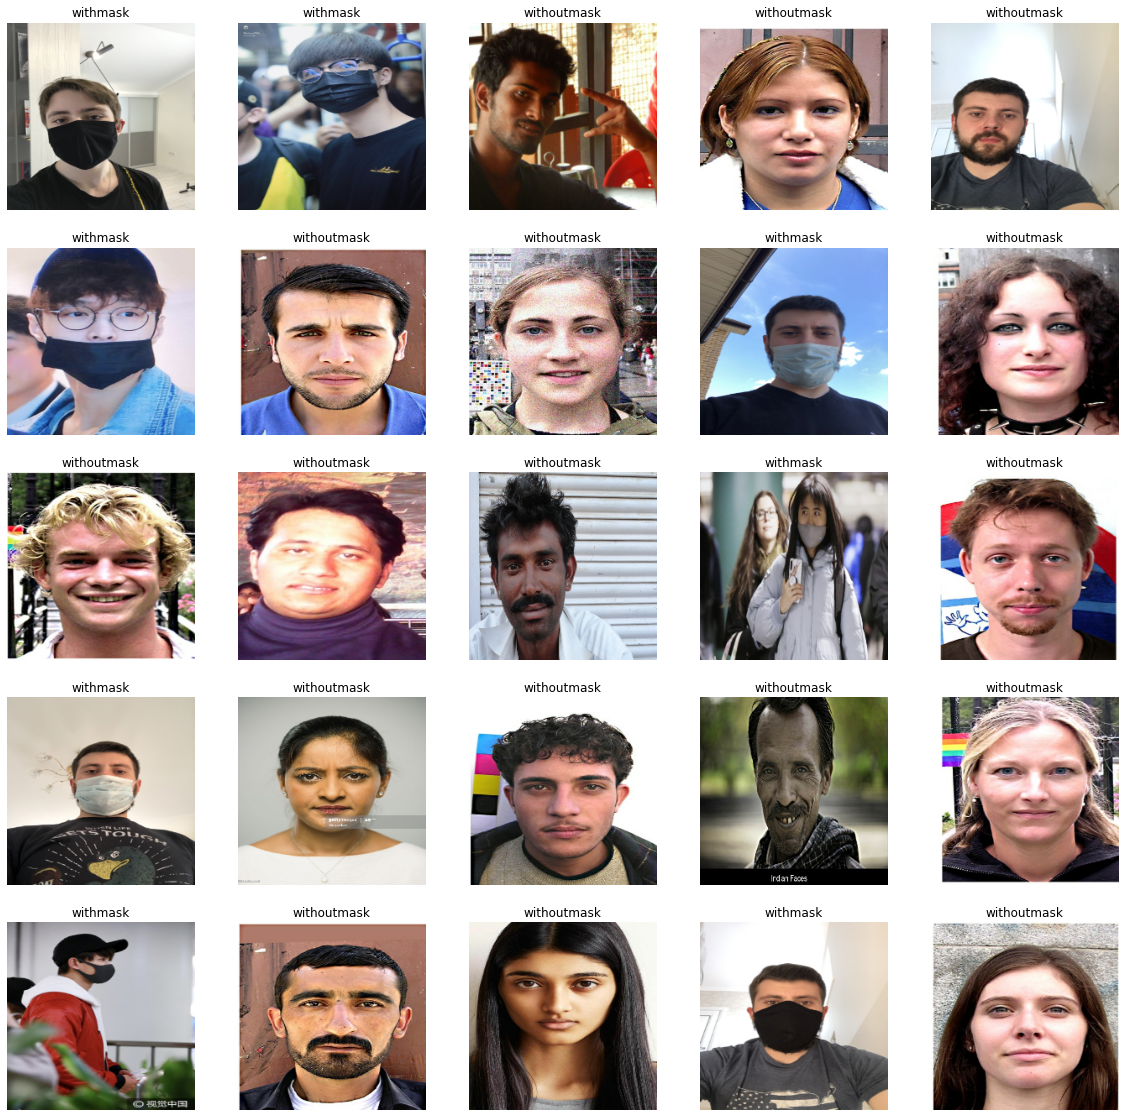

In [34]:
# let's show data
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images,train_labels)

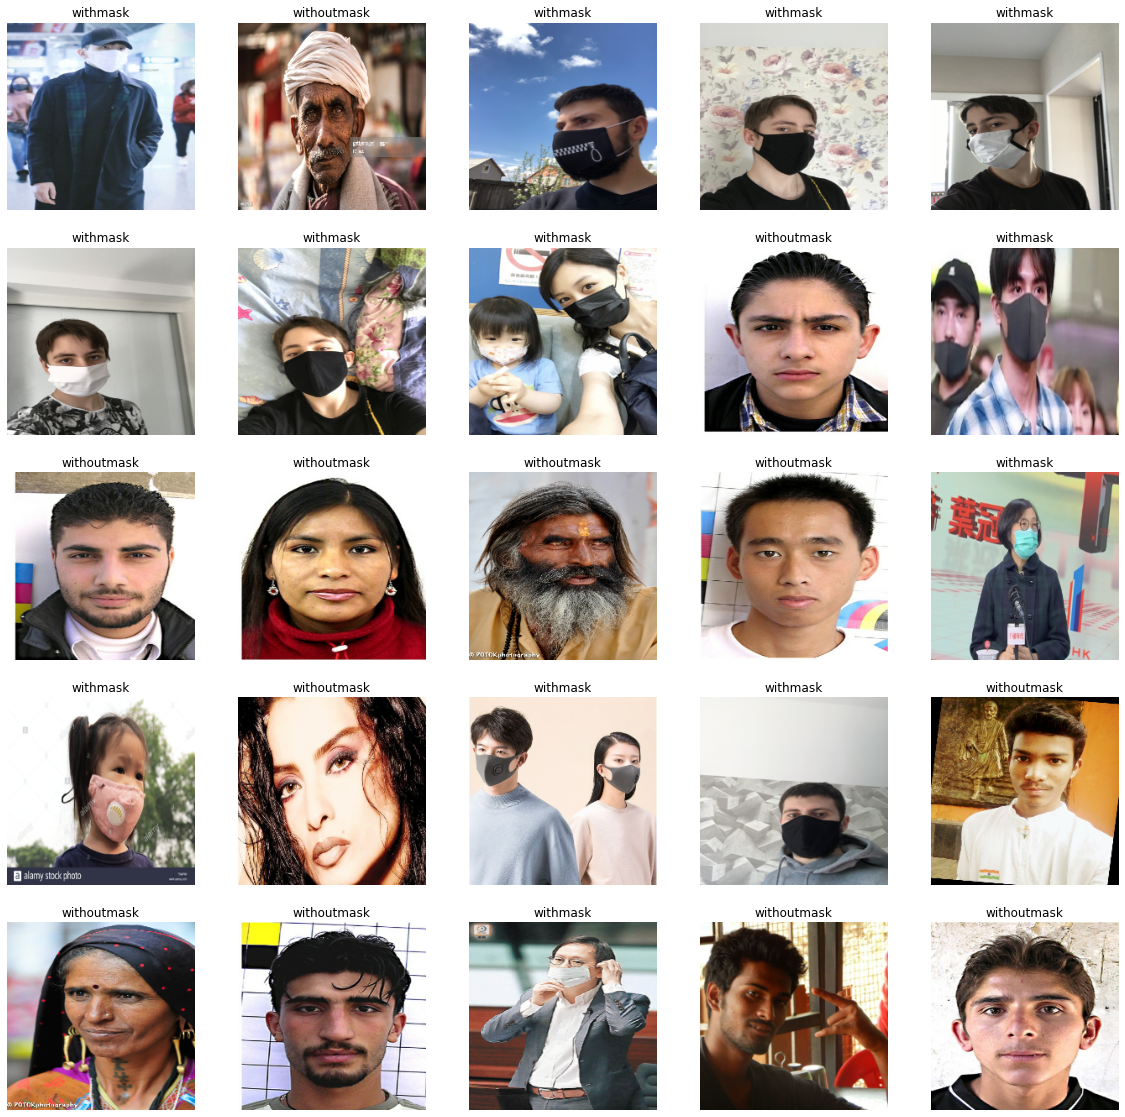

In [35]:
# For valid data
val_images, val_labels = next(val_data.as_numpy_iterator())
show_images(val_images, val_labels)

## 6. Building a model 

Before we build a model--->

* The input shape.
* The output shape.
* The URL of the model we want to use.

In [36]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, height, width, Colour_chanels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_category)

# Setup model URL
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [37]:
# Create a fun to build a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", model_url)

  # Setup the model
  model = tf.keras.Sequential([
                               hub.KerasLayer(model_url),
                               tf.keras.layers.Dense(units=output_shape, 
                                                     activation="softmax")
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(input_shape)

  return model

In [40]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2004      
Total params: 5,434,717
Trainable params: 2,004
Non-trainable params: 5,432,713
_________________________________________________________________


## 7. Creating callbacks

### 7.1 Early stopping callback

In [41]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience = 3)

## 8. Training a model

In [42]:
NUM_EPOCHS = 30

In [44]:
# Fit the model
history = model.fit(x=train_data,
                    epochs= NUM_EPOCHS,
                    validation_data=val_data,
                    callbacks=early_stopping)

Epoch 1/30
15/15 [==============================] - 15s 971ms/step - loss: 0.5246 - accuracy: 0.7848 - val_loss: 0.0787 - val_accuracy: 0.9739
Epoch 2/30
15/15 [==============================] - 13s 875ms/step - loss: 0.0607 - accuracy: 0.9804 - val_loss: 0.0346 - val_accuracy: 0.9826
Epoch 3/30
15/15 [==============================] - 14s 907ms/step - loss: 0.0260 - accuracy: 0.9978 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 4/30
15/15 [==============================] - 14s 918ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 0.9913
Epoch 5/30
15/15 [==============================] - 14s 939ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 0.9913
Epoch 6/30
15/15 [==============================] - 14s 945ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9913


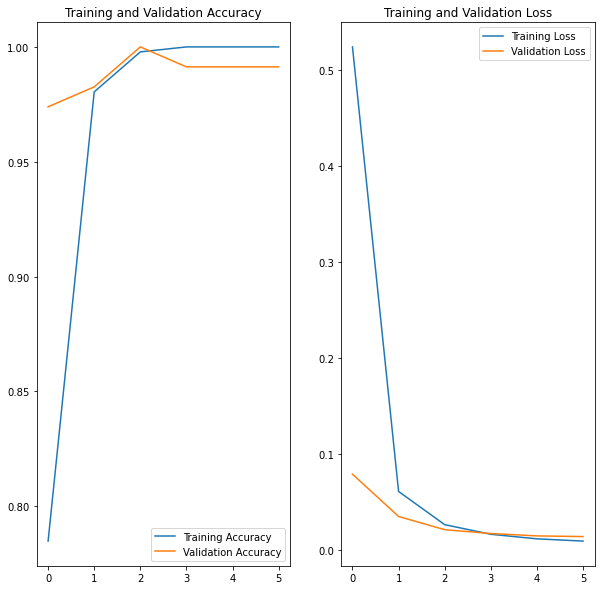

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(6)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Making and evaluating prediction using a trained model

In [46]:
# Make prediction on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

4/4 [==============================] - 2s 525ms/step


array([[9.99622822e-01, 3.77200951e-04],
       [2.37522507e-03, 9.97624815e-01],
       [9.99949813e-01, 5.01896029e-05],
       [9.99290943e-01, 7.09078158e-04],
       [9.99960780e-01, 3.92242800e-05],
       [9.98630941e-01, 1.36902940e-03],
       [9.99301314e-01, 6.98614982e-04],
       [9.99965072e-01, 3.49540169e-05],
       [3.86056199e-05, 9.99961376e-01],
       [9.99984741e-01, 1.52075645e-05],
       [2.22172476e-02, 9.77782726e-01],
       [4.35036694e-04, 9.99564946e-01],
       [1.08761736e-03, 9.98912334e-01],
       [8.62932112e-03, 9.91370678e-01],
       [9.99809682e-01, 1.90319843e-04],
       [9.97848272e-01, 2.15178961e-03],
       [5.94218203e-04, 9.99405742e-01],
       [9.98961210e-01, 1.03877147e-03],
       [9.99481022e-01, 5.19002264e-04],
       [6.76884037e-03, 9.93231177e-01],
       [2.75217753e-05, 9.99972463e-01],
       [7.24503945e-04, 9.99275506e-01],
       [9.99993324e-01, 6.69809288e-06],
       [9.58394085e-04, 9.99041617e-01],
       [6.392422

In [47]:
predictions.shape

(115, 2)

In [48]:
np.sum(predictions[0])

1.0

In [49]:
def make_prediction(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """

  return unique_category[np.argmax(prediction_probabilities)]

In [50]:
pred_label = make_prediction(predictions[17])
pred_label

'withmask'

In [51]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 2)), types: (tf.float32, tf.bool)>

In [53]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_category[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)

In [54]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = make_prediction(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

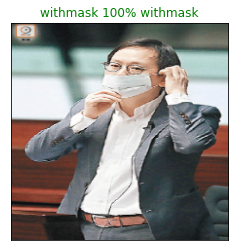

In [56]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=22)

In [57]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = make_prediction(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_category[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

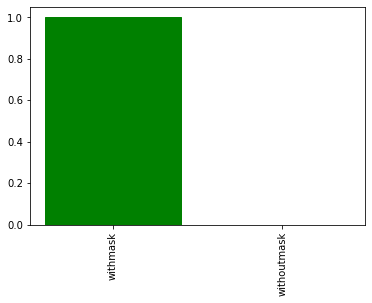

In [58]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

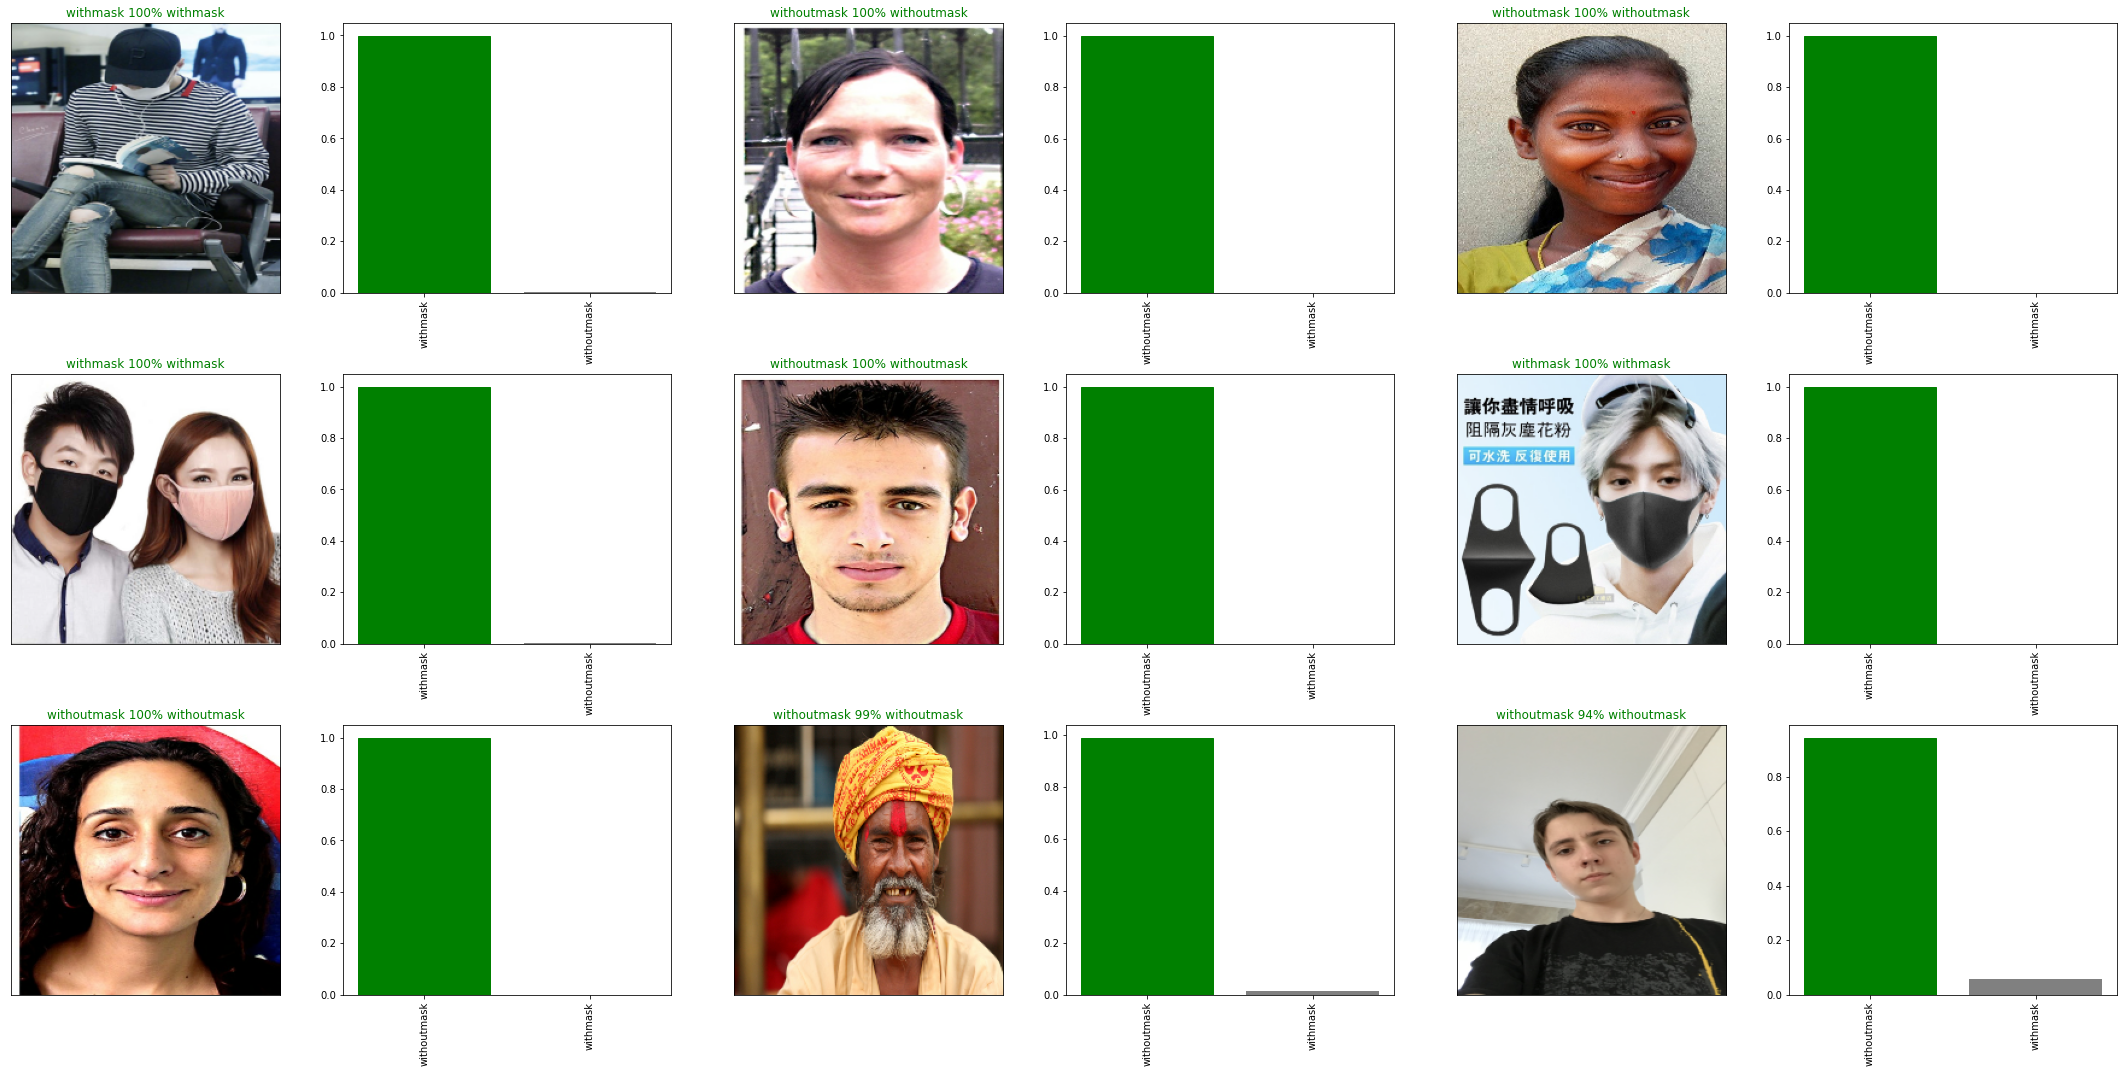

In [60]:
# Let's check out a few predictions and their different values
i_multiplier = 30
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [61]:
model.save("model/MobilenetV2-Adam.h5")

In [62]:
# Evaluate the pre-saved model
model.evaluate(val_data)

4/4 [==============================] - 2s 526ms/step - loss: 0.0136 - accuracy: 0.9913


[0.01360330730676651, 0.991304337978363]

## Predict on custom data

In [67]:
def test_data(image_path):
    # Read in an image file
    image = tf.io.read_file(image_path)
    # Turn the jpg image into numerical Tensor with 3 colour channel(RGB)
    image = tf.image.decode_jpeg(image,channels=3)
    # Convert the color channel values to (0-1) values
    image = tf.image.convert_image_dtype(image,tf.float32)
    # Resize the image to (224,224)
    image = tf.image.resize(image, size=[224,224])
    #Expand image from [224,224,3] to [1,224,224,3]
    image = np.expand_dims(image,axis=0)
    #Prediction on image
    pred = model.predict(image)
    #Give name of label 
    result = unique_category[np.argmax(pred)]
    
    return result

In [68]:
test_data('test1.jpg')

'withoutmask'

## Making GUI with tkinter

In [69]:
from tkinter import *
def GUI():
    import tkinter as tk
    from tkinter import filedialog
    from matplotlib.pyplot import imread
    import tensorflow as tf
    import tensorflow_hub as hub
    import numpy as np
    from PIL import ImageTk, Image

    print('_________________________________')
    print('..........Start loading..........')

    model = tf.keras.models.load_model('model/-mobilenetv2-Adam.h5', custom_objects={"KerasLayer": hub.KerasLayer})

    print('_________________________________')
    print('..........Model Loaded...........')
    print('_________________________________')

    # dictionary to label all traffic signs class.
    labels = ['WithMask', 'WithOutMask']


    # initialise GUI
    top = tk.Tk()
    top.geometry('800x600')
    top.title('Face Mask Classification')
    top.configure(background='#CDCDCD')
    label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
    sign_image = Label(top)


    def classify(file_path):
        global label_packed
        # Read in an image file
        image = tf.io.read_file(file_path)
        # Turn the jpg image into numerical Tensor with 3 colour channel(RGB)
        image = tf.image.decode_jpeg(image,channels=3)
        # Convert the color channel values to (0-1) values
        image = tf.image.convert_image_dtype(image,tf.float32)
        # Resize the image to (224,224)
        image = tf.image.resize(image, size=[224,224])
        image = np.expand_dims(image, axis=0)
        pred = model.predict(image)
        sign = labels[np.argmax(pred)]
        print(sign)
        label.configure(foreground='#011638', text=sign)


    def show_classify_button(file_path):
        classify_b = Button(top, 
                            text="Classify Image",
                            command=lambda: classify(file_path),
                            padx=10, 
                            pady=5)
        classify_b.configure(background='#364156', 
                             foreground='white',
                             font=('arial', 10, 'bold'))
        classify_b.place(relx=0.79, rely=0.46)


    def upload_image():
        try:
            file_path = filedialog.askopenfilename()
            uploaded = Image.open(file_path)
            uploaded.thumbnail(((top.winfo_width()/2.25),
                                (top.winfo_height()/2.25)))
            im = ImageTk.PhotoImage(uploaded)
            sign_image.configure(image=im)
            sign_image.image = im
            label.configure(text='')
            show_classify_button(file_path)
        except:
            pass

    upload = Button(top, text="Upload an image",
                    command=upload_image, padx=10, pady=5)
    upload.configure(background='#364156', foreground='white',
                     font=('arial', 10, 'bold'))
    upload.pack(side=BOTTOM, pady=50)
    sign_image.pack(side=BOTTOM, expand=True)
    label.pack(side=BOTTOM, expand=True)
    heading = Label(top, text="Face Mask Classification",
                    pady=20, font=('arial', 20, 'bold'))
    heading.configure(background='#CDCDCD', foreground='#364156')
    heading.pack()
    top.mainloop()

In [70]:
GUI()

_________________________________
..........Start loading..........
_________________________________
..........Model Loaded...........
_________________________________
WithOutMask
WithMask
